<a href="https://colab.research.google.com/github/raeshmakr/Seaborn/blob/main/seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB
None
       Unnamed: 0  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  344.000000      342.000000     342.000000         342.000000   
mean   172.500000       43.921930      17.151170         200.915205   
std     99.448479        5.459584       1.974793          14.061714   
min      1.00000

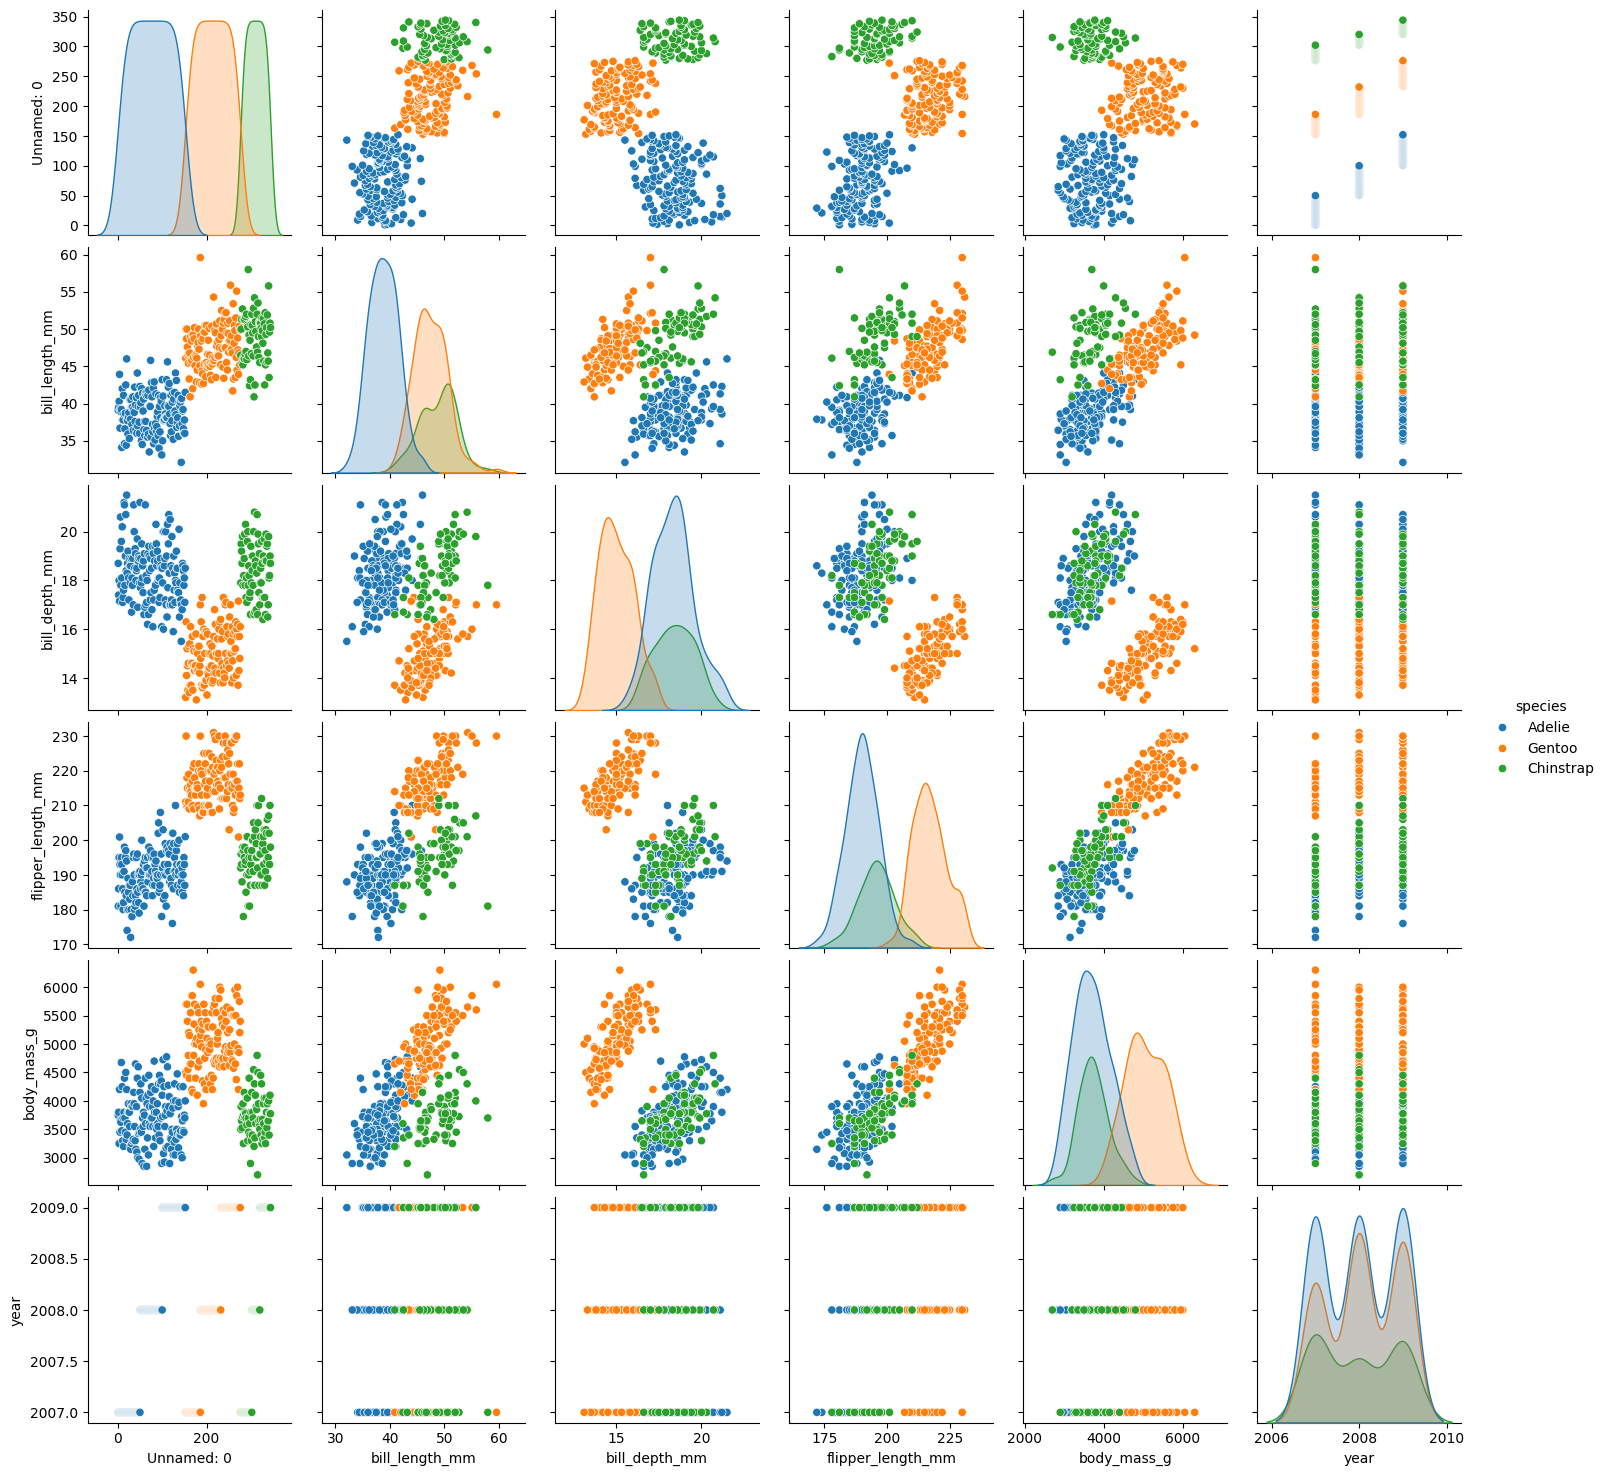

In [11]:
#1. Download the dataset : https://www.kaggle.com/datasets/larsen0966/penguins
#a. Visualize the data with all pairwise relationship of each variable with respect to different species

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("penguins.csv")

# Explore the dataset
print(df.info())
print(df.describe())
print(df.head())
# Check for missing values
print(df.isnull().sum())
# Data Cleaning
# Fill missing values with mean
df['bill_length_mm'].fillna(df['bill_length_mm'].mean(), inplace=True)
df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)
print(df.isnull().sum())

# Visualize the data
sns.pairplot(df, hue="species")
plt.show()

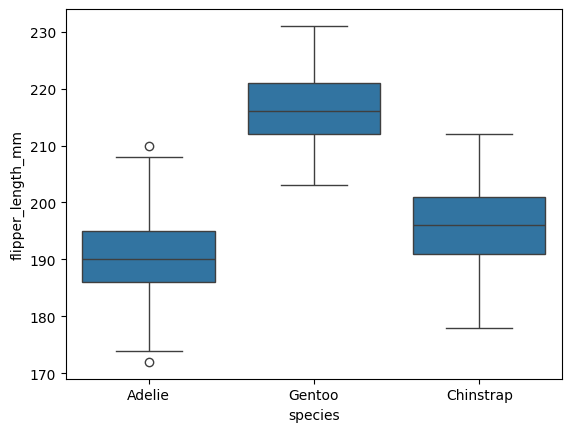

In [2]:
#boxplot
sns.boxplot(x="species", y="flipper_length_mm", data=df)
plt.show()

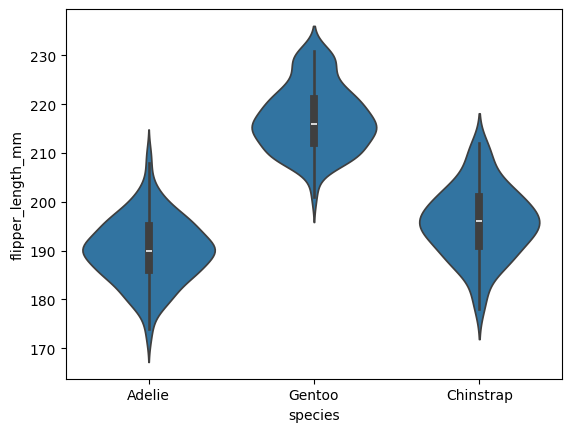

In [14]:
#3. Write a python program to create a seaborn violin plot to visualize the distributions of a numerical
#variable
#violin plot
sns.violinplot(x="species", y="flipper_length_mm", data=df)
plt.show()

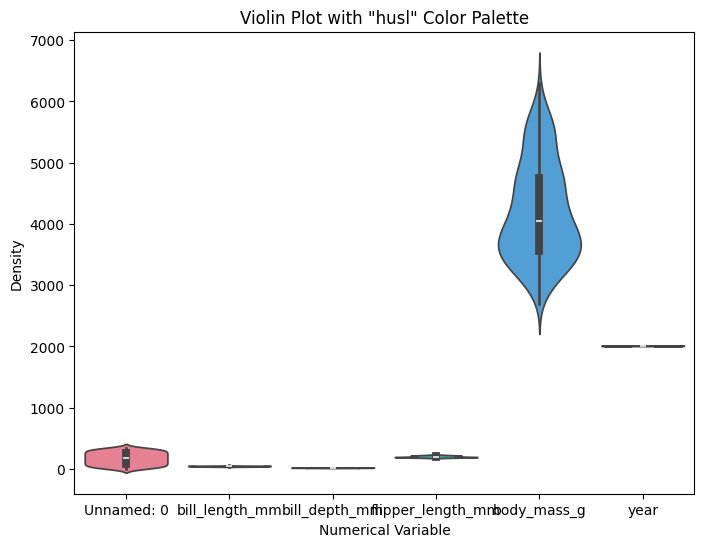

In [15]:
#4. Customize qstn 3 with color palette husl
plt.figure(figsize=(8, 6))
sns.set_palette("husl")
sns.violinplot(data=df)
plt.title('Violin Plot with "husl" Color Palette')
plt.xlabel('Numerical Variable')
plt.ylabel('Density')
plt.show()

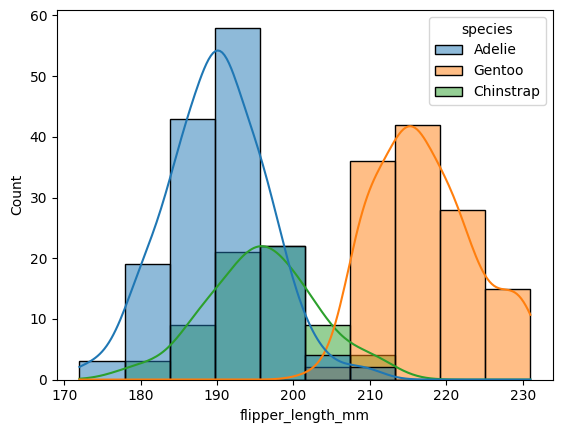

In [4]:
#histogram
sns.histplot(data=df, x="flipper_length_mm", hue="species", kde=True)
plt.show()

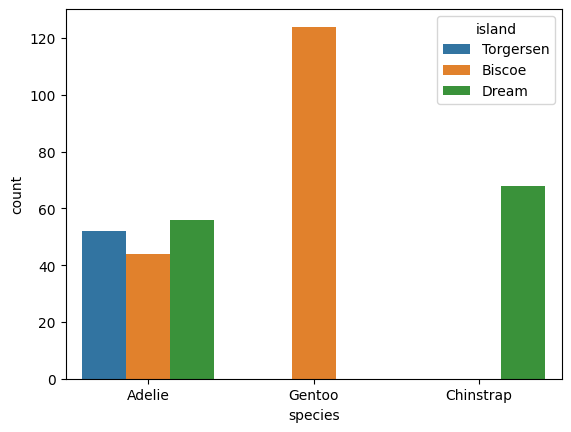

In [5]:
#barplot
sns.countplot(data=df, x="species", hue="island")
plt.show()

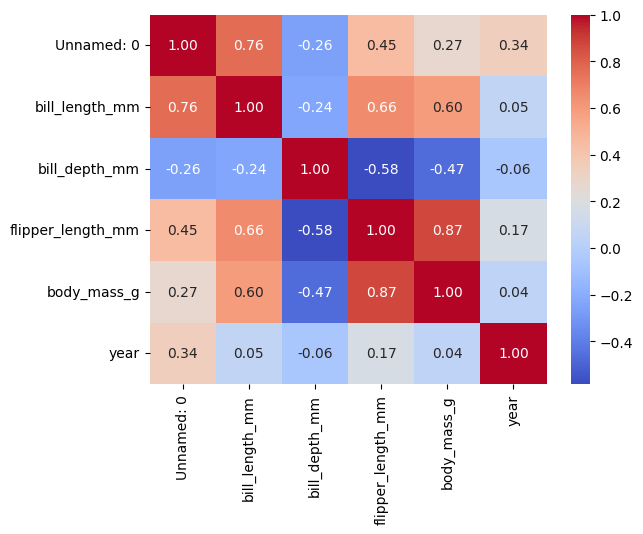

In [13]:
#corelation heatmap
# Selecting only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation
corr = numerical_df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

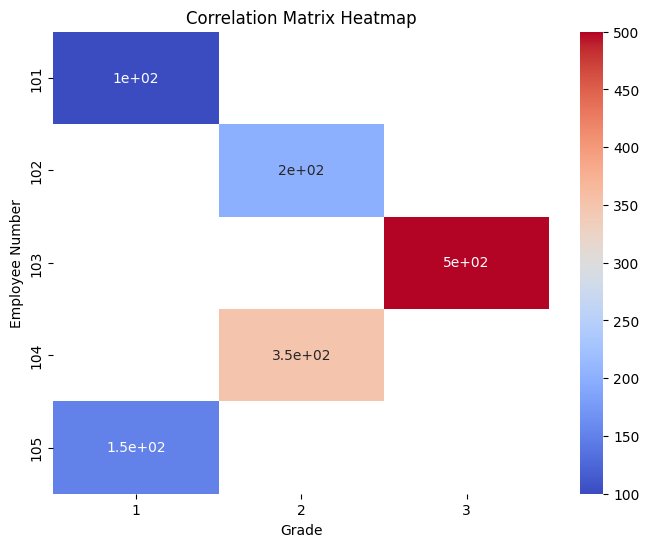

In [19]:
#5.Write a python program to create a seaborn heatmap to visualize a correlation matrix of numerical data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load own Dataset
data = {
    'empNo': [101, 102, 103, 104, 105],
    'grade': [1, 2, 3, 2, 1],
    'incentives': [100, 200, 500, 350, 150]
}
df = pd.DataFrame(data)

# Create a correlation matrix
correlation_matrix = df.pivot_table(index="empNo", columns="grade", values="incentives")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Grade')
plt.ylabel('Employee Number')
plt.show()


Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               1
dtype: int64
Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               1
dtype: int64


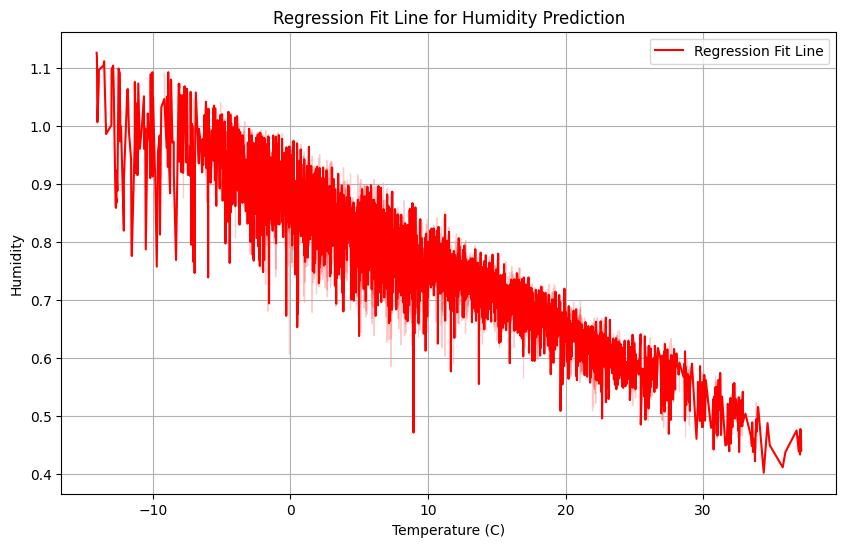

In [20]:
#2. Download the dataset : https://www.kaggle.com/datasets/muthuj7/weather-dataset
#a. Visualize the regression fit line with the data points of Humidity prediction

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv("weatherHistory.csv")

# Check for missing values in the selected columns after dropping
print(df.isnull().sum())
# Impute missing "Precip Type" values with the mode
mode_precip_type = df['Precip Type'].mode()[0]
df['Precip Type'].fillna(mode_precip_type, inplace=True)
print(df.isnull().sum())


# Convert 'Formatted Date' to datetime
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])

# Select relevant columns for humidity prediction
# Drop rows with missing values
df.dropna(subset=['Temperature (C)', 'Apparent Temperature (C)', 'Wind Speed (km/h)',
                     'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)', 'Humidity'], inplace=True)

# Split the data into features and target variable (X and y)
X = df.drop(columns=['Humidity'])
y = df['Humidity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop non-numeric columns
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])


# Fit model
model = LinearRegression()
model.fit(X_train_numeric, y_train)

# Visualize the regression fit line with data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_numeric['Temperature (C)'], y=y_test, color='blue', label='Actual Data')
sns.lineplot(x=X_train_numeric['Temperature (C)'], y=model.predict(X_train_numeric), color='red', label='Regression Fit Line')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.title('Regression Fit Line for Humidity Prediction')
plt.legend()
plt.grid(True)
plt.show()
